In [108]:
import math
import PIL
import extcolors
import numpy as np
import urllib.request
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
from matplotlib import gridspec
import pandas as pd

### Get color palette from an image

In [109]:
paintings= pd.read_csv("datasets/prado_oil.csv")

In [110]:
paintings.sample(5)

,title,subtitle,artist,img_link,year,img_name
814,The Adoration of the Magi,Oil on canvas,"Cajés, Eugenio",https://content3.cdnprado.net/imagenes/Documen...,1600,aff88e39-77c2-4eb4-a559-2bae1a9673b8_268.jpg
281,Jesus carrying the Cross,Oil on slate,"Piombo, Sebastiano del",https://content3.cdnprado.net/imagenes/Documen...,1535,0503f4c5-39ee-4193-af3a-9b07b2167731_268.jpg
1668,Passage from the Life of Saint Francis,Oil on canvas,"Cabezalero, Juan Martín",https://content3.cdnprado.net/imagenes/Documen...,1929,785859ee-3ffe-4aef-bea2-0b44c49b41b3_268.jpg
2674,Portrait of a Lady,Oil on canvas,"González Velázquez, Zacarías",https://content3.cdnprado.net/imagenes/Documen...,1810,2357608f-e4b0-4dde-a096-7373de9a6eab_268.jpg
2848,Liuvigild,Oil on canvas,"Barroeta y Anguisolea, Juan de",https://content3.cdnprado.net/imagenes/Documen...,1855,b58362a9-aa04-4c6f-8fee-32766018b2ff_268.jpg


In [111]:
# group of functions -> it will return my image + the color palette that's been used 
def study_image(img):
  im = Image.open(img)
  colors = extract_colors(img)
  color_palette = render_color_platte(colors)
  return overlay_palette(img, color_palette)

# function that extracts the color codes of the image - palette in codes
def extract_colors(img):
  im = Image.open(img)
  tolerance = 32
  limit = 24
  colors, pixel_count = extcolors.extract_from_image(im, tolerance, limit)
  return colors


# this transforms color code into the color palette
def render_color_platte(colors):
  size = 100
  columns = 6
  width = int(min(len(colors), columns) * size)
  height = int((math.floor(len(colors) / columns) + 1) * size)
  result = Image.new("RGBA", (width, height), (0, 0, 0, 0))
  canvas = ImageDraw.Draw(result)
  for idx, color in enumerate(colors):
      x = int((idx % columns) * size)
      y = int(math.floor(idx / columns) * size)
      canvas.rectangle([(x, y), (x + size - 1, y + size - 1)], fill=color[0])
  return result


# groups image and color palette rectangle
def overlay_palette(img, color_palette):
  img = Image.open(img)
  nrow = 2
  ncol = 1
  f = plt.figure(figsize=(10,10), facecolor='None', edgecolor='k', dpi=55, num=None)
  gs = gridspec.GridSpec(nrow, ncol, wspace=0.0, hspace=0.0) 
  f.add_subplot(2, 1, 1)
  plt.imshow(img, interpolation='nearest')
  plt.axis('off')
  f.add_subplot(1, 2, 2)
  plt.imshow(color_palette, interpolation='nearest')
  plt.axis('off')
  plt.subplots_adjust(wspace=0, hspace=0, bottom=0)
  plt.show(block=True)




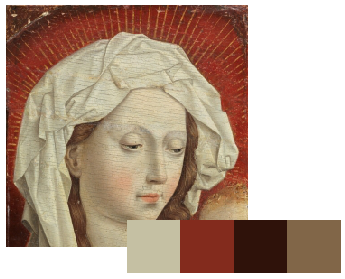

[((197, 192, 163), 42718), ((131, 43, 29), 24988), ((47, 18, 10), 2750), ((129, 102, 72), 1368)]


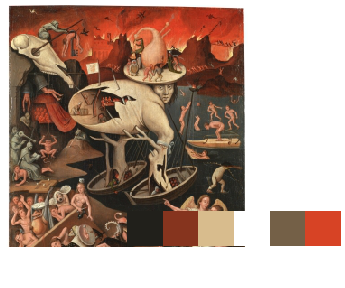

[((33, 32, 27), 31872), ((134, 52, 30), 21234), ((216, 188, 141), 12316), ((255, 255, 255), 3584), ((116, 96, 71), 1918), ((215, 67, 37), 900)]


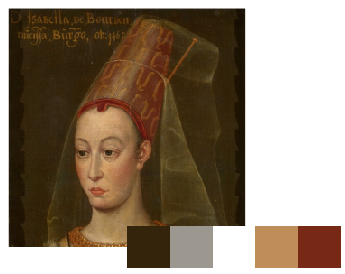

[((52, 36, 11), 59588), ((156, 152, 143), 7249), ((255, 255, 255), 2395), ((191, 141, 90), 2369), ((119, 41, 21), 223)]


In [112]:
image = paintings["img_name"][:3]
for e in image:
    path = f"images/prado_paintings/{e}"

    study_image(path)
    print(extract_colors(path))

In [113]:
paintings.sample(5)

,title,subtitle,artist,img_link,year,img_name
1674,"Catherine of Braganza, Queen consort of Englan...",Oil on canvas,"Nocret, Jean",https://content3.cdnprado.net/imagenes/Documen...,1929,8b91c14a-4621-4bbc-a4fe-3cc3fae86166_268.jpg
642,"Margaret of Austria, Queen of Spain",Oil on canvas,"González, Bartolomé",https://content3.cdnprado.net/imagenes/Documen...,1929,1bf47315-c0fc-439b-83e4-0e504e9fc1fa_268.jpg
2945,The Painter Matías Moreno,Oil on canvas,Carolus Duran. Charles-Emile-Auguste Durand,https://content3.cdnprado.net/imagenes/Documen...,1867,42759f4d-300e-49fb-bfc3-c3c5d7ede547_268.jpg
2334,Still Life with Chocolate Service,Oil on canvas,"Meléndez, Luis Egidio",https://content3.cdnprado.net/imagenes/Documen...,1770,480c6629-72a6-4aa4-b2ec-357348895f7c_268.jpg
1108,The Martyrdom of the Carthusians of Bourg Font...,Oil on canvas,"Carducho, Vicente",https://content3.cdnprado.net/imagenes/Documen...,1632,139ea711-401f-4dc8-91cd-b82a39df18c0_268.jpg


In [114]:
# estudi goya

goya = paintings[paintings['artist'].astype(str).str.contains('Goya', case=False)]

In [42]:
goya

,title,subtitle,artist,img_link,year,img_name
2325,Saint Barbara,Oil on canvas,"Goya y Lucientes, Francisco de",https://content3.cdnprado.net/imagenes/Documen...,1772,e8587d2d-86d8-4aa0-8499-95db4e02699f_268.jpg
2366,The Victorious Hannibal seeing Italy from the ...,Oil on canvas,"Goya y Lucientes, Francisco de",https://content3.cdnprado.net/imagenes/Documen...,1771,7edc8e0f-0440-4fbe-8f23-6e92c339814b_268.jpg
2403,Dogs on a Leash,Oil on canvas,"Goya y Lucientes, Francisco de",https://content3.cdnprado.net/imagenes/Documen...,1775,a456f5bb-6d42-46c7-af69-4fcf34427623_268.jpg
2404,A Hunter with his Hounds,Oil on canvas,"Goya y Lucientes, Francisco de",https://content3.cdnprado.net/imagenes/Documen...,1775,610d62fc-d6d7-4d96-af87-8b660332bf6d_268.jpg
2405,Decoy Hunting,Oil on canvas,"Goya y Lucientes, Francisco de",https://content3.cdnprado.net/imagenes/Documen...,1775,d6d45fae-8a73-4e91-90f4-d0e4bfa5e6b1_268.jpg
...,...,...,...,...,...,...
2708,Saints Justa and Rufina,Oil on cedar panel,"Goya y Lucientes, Francisco de",https://content3.cdnprado.net/imagenes/Documen...,1817,d2a0b5af-1778-4e81-a410-d8a8ea14b06c_268.jpg
2714,A Manola: Leocadia Zorilla,Oil on mural transferred to canvas,"Goya y Lucientes, Francisco de",https://content3.cdnprado.net/imagenes/Documen...,1823,e04801ae-5f63-4dd0-9986-425961c11b86_268.jpg
2715,"Witches' Sabbath, or the Great He-Goat",Oil on mural transferred to canvas,"Goya y Lucientes, Francisco de",https://content3.cdnprado.net/imagenes/Documen...,1823,3fe948c5-7b09-4700-9298-18f66085055e_268.jpg
2720,The Milkmaid of Bordeaux,Oil on canvas,"Goya y Lucientes, Francisco de",https://content3.cdnprado.net/imagenes/Documen...,1827,e1dc21e4-0b51-4558-be98-d5b29fe4e0cc_268.jpg


In [115]:
def get_palette_list (col_images):
    palettelist=[]
    for cuadro in col_images:
        path = f"images/prado_paintings/{cuadro}"

        #study_image(path)
        palettelist.append(extract_colors(path))
    return palettelist

    

In [116]:
goyapalette= get_palette_list(goya["img_name"])

In [119]:

def get_top3_colors(palettelist):
    all_color=[]
    for palette in palettelist:
        for color in palette:
            all_color.append(color)
    count1=0
    count2=0
    count3=0
    
    col1=()
    col2=()
    col3=()
    
    # I will drop white, as it is from the sorrundings of the image
    
    for elem in all_color:
        if elem[0]==(255, 255, 255):
            all_color.remove(elem)

    for c in all_color:
        curr_frequency = all_color.count(c)
        if curr_frequency> count1:
            count1 = curr_frequency
            col1 = c

        elif curr_frequency> count2:
            count2= curr_frequency
            col2=c

        elif curr_frequency> count3:
            count3= curr_frequency
            col3=c



    return [col1,col2,col3]       
        

In [120]:
main_color_goya = get_top3_colors(goyapalette)
main_color_goya

[((33, 28, 24), 48441), ((116, 82, 37), 8959), ((166, 171, 148), 1863)]

In [121]:
main_color_goya[0][0]

(33, 28, 24)

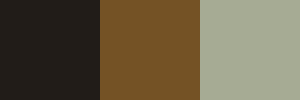

In [122]:
render_color_platte(main_color_goya)

In [123]:
# agrupo en una funció per a treuere el top 3 de colors d'un DataFrame

def color3_from_dataframe (column):
    lista_paleta = get_palette_list(column)
    main_colors = get_top3_colors(lista_paleta)
    return render_color_platte(main_colors)

def color3_codes (column):
    lista_paleta = get_palette_list(column)
    return get_top3_colors(lista_paleta)


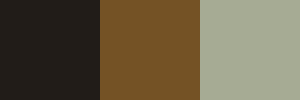

In [124]:
color3_from_dataframe(goya["img_name"])



In [125]:
color3_codes(goya["img_name"])

[((33, 28, 24), 48441), ((116, 82, 37), 8959), ((166, 171, 148), 1863)]

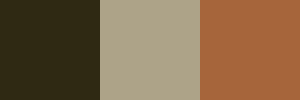

In [126]:
velaz = paintings[paintings['artist'].astype(str).str.contains('Velázquez', case=False)]
velaz

color3_from_dataframe(velaz["img_name"])

In [127]:
color3_codes(velaz["img_name"])

[((47, 41, 19), 59585), ((173, 163, 136), 4692), ((166, 101, 59), 3612)]

In [128]:
color3_from_dataframe(paintings["img_name"])

UnidentifiedImageError: cannot identify image file 'images/prado_paintings/86d75c9b-af1c-4e52-86fe-9ee9f7987ae8_268.jpg'

In [129]:
# afegir try/except a la funció